In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
import joblib

# 1. **Introduction**
"""
Objective: Predict whether a bacterium is harmful to humans based on its family and location.
Goal: Build a machine learning model that achieves an accuracy of at least 80%.
"""

# 2. **Data Loading**

In [4]:
# Import the dataset
df = pd.read_csv('bacteria_list_200.csv')

# 3. **Data Cleaning**

In [6]:
# Initial glance at the data
print("\nPreview of the Data:\n", df.head())
print("\nData Overview:\n")
df.info()

# 3. **Data Cleaning**
# Check for missing data
missing_values = df.isnull().sum()
print("\nMissing Data Report:\n", missing_values)

# Remove rows with missing values
df.dropna(inplace=True)

# Eliminate duplicate rows if any
df.drop_duplicates(inplace=True)

# Ensure the 'Harmful to Humans' column is treated as a categorical variable
df['Harmful to Humans'] = df['Harmful to Humans'].astype(str)


Preview of the Data:
                         Name              Family  \
0           Escherichia coli  Enterobacteriaceae   
1      Staphylococcus aureus   Staphylococcaceae   
2  Lactobacillus acidophilus    Lactobacillaceae   
3          Bacillus subtilis         Bacillaceae   
4      Clostridium botulinum      Clostridiaceae   

                     Where Found Harmful to Humans  
0               Intestinal tract               Yes  
1           Skin, nasal passages               Yes  
2        Human mouth & intestine                No  
3                           Soil                No  
4  Soil, improperly canned foods               Yes  

Data Overview:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Name               199 non-null    object
 1   Family             199 non-null    object
 2   Where Found        199 non-null 

# 4. **Exploratory Analysis**


Statistical Summary:
                            Name              Family Where Found  \
count                       196                 196         196   
unique                      194                  93         120   
top     Fusobacterium nucleatum  Enterobacteriaceae        Soil   
freq                          2                  21          17   

       Harmful to Humans  
count                196  
unique                 3  
top                   No  
freq                 102  


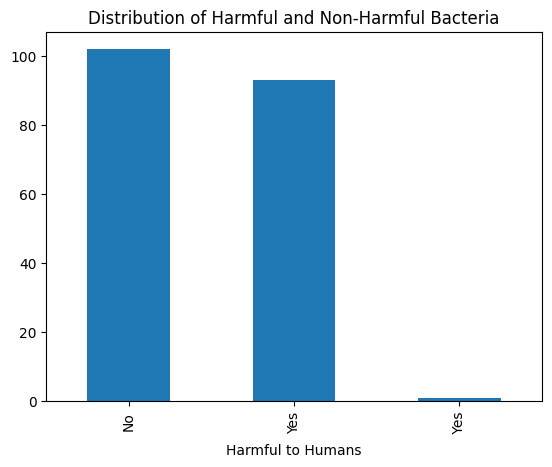

Skipping correlation heatmap because the values are identical.


<Figure size 1000x800 with 0 Axes>

In [9]:
# Overview of basic statistics
print("\nStatistical Summary:\n", df.describe(include='all'))

# Distribution of harmful vs non-harmful bacteria
df['Harmful to Humans'].value_counts().plot(kind='bar', title='Distribution of Harmful and Non-Harmful Bacteria')
plt.show()

# Correlation analysis
plt.figure(figsize=(10, 8))
correlation_matrix = df.select_dtypes(include=[np.number]).corr()

# Check if correlation matrix is valid
if correlation_matrix.nunique().max() > 1:
    plt.title("Feature Correlation Heatmap")
    plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none', vmin=-1, vmax=1)
    plt.colorbar()
    plt.show()
else:
    print("Skipping correlation heatmap because the values are identical.")

# 5. **Feature Preparation**

In [10]:
# Convert categorical data into numbers using label encoding
encoder_family = LabelEncoder()
encoder_location = LabelEncoder()
encoder_harmful = LabelEncoder()

df['Family_encoded'] = encoder_family.fit_transform(df['Family'])
df['Location_encoded'] = encoder_location.fit_transform(df['Where Found'])
df['Harmful_encoded'] = encoder_harmful.fit_transform(df['Harmful to Humans'])

# Define features (X) and labels (y)
X = df[['Family_encoded', 'Location_encoded']]
y = df['Harmful_encoded']

# Normalize the feature values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)